In [ ]:
import os
from Code.fonctions.clip_otb_extractROI import script_otb_extractROI, get_images_path

path = get_images_path(r"E:\Travail\Stage_PNRBrenne\Data\Data_Sentinel\S2_brut")
vectorfile = r"E:\Travail\Stage_PNRBrenne\Data\data_PNR\emprise_pnr\emprise_pnr_brenne.sjp.shp"
output_file = r"E:\Travail\Stage_PNRBrenne\Data\Data_Sentinel\output_clip"
cmd = script_otb_extractROI(path, vectorfile,output_file)

print(cmd)

In [ ]:
from fonctions.my_function import rasterization
import geopandas as gpd

in_vector = r"E:\Stage_PNRBrenne\Data\data_PNR\etangs_brenne\PE_PNRB_2020v3.3_ANONYM.shp"
out_image = r"E:\Stage_PNRBrenne\Data\data_PNR\masque_etang.tif"
field_name = "code"
sp_resol = 10
ref_image = r"E:\Stage_PNRBrenne\Data\data_PNR\image_bonne_emprise.tif"
dtype = "Byte"

rasterization(in_vector=in_vector, out_image=out_image, field_name=field_name, 
              sp_resol=sp_resol, ref_image=ref_image, dtype = dtype)

In [ ]:
import fonctions.read_and_write as rw
import os
from fonctions.my_function import pre_traitement_img


p_emprise = r"E:\Stage_PNRBrenne\Data\data_PNR\emprise_pnr\emprise_pnr_brenne.shp"
l_images = os.listdir(r"E:\Stage_PNRBrenne\Data\Data_Sentinel\L3\S2_brut")
input_raster_dir = r"E:\Stage_PNRBrenne\Data\Data_Sentinel\L3\S2_brut"
output_dir = r"E:\Stage_PNRBrenne\Data\Data_Sentinel\L3\S2_pre_trait_temp"
os.makedirs(output_dir, exist_ok=True)

pre_traitement_img(p_emprise, l_images, input_raster_dir, output_dir)

In [1]:
# Pour associer les images L3 en un netcdf

from fonctions.sentinel_processor import SentinelProcessor
import glob
from pathlib import Path
import natsort
from collections import OrderedDict
import os

in_dir = "/home/onyxia/work/L3/in_dir"
path_list = sorted(glob.glob(pathname=os.path.join(in_dir,"**/*FRC*.tif"), recursive=True))

output_path = "/home/onyxia/work/L3/out_dir/S2_L3_2020.nc"
bb_path = "/home/onyxia/work/data/masque_etangs.tif"
custom_chunks = {"x": 100, "y": 100, "time": 1}
target_crs = "EPSG:2154"
processor = SentinelProcessor(
    file_list=path_list[:10], 
    dir_global=in_dir, 
    output_path=output_path, 
    crs=target_crs,
    clip_ref=bb_path)
array = processor.build_dataset(chunking="auto")
# processor.save_dataset()

# L = []
# list_array = list(array.groupby("time.month"))
# for i in list_array:
#     array_date = i[1]
#     date = str(array_date.time.values[0])[:7]
#     L.append(array_date)
#     # array_date.to_netcdf(os.path.join(r"E:\Stage_PNRBrenne\Data\Data_Sentinel\L3\S2_concat\emprise_reduite",f"{date}.nc"))

📂 Chargement : SENTINEL2A_20201215-000000-000_L3A_T31TCM_C_V2-2_FRC_B11.tif (Bande B11, Date 2020-12-15)
🔄 Rééchantillonnage de B11 à 10m...
🎯 Image de référence : SENTINEL2A_20201215-000000-000_L3A_T31TCM_C_V2-2_FRC_B2.tif
Application du masque SENTINEL2A_20201215-000000-000_L3A_T31TCM_C_V2-2_FLG_R1.tif
🎯 Image de référence : SENTINEL2A_20201215-000000-000_L3A_T31TCM_C_V2-2_FRC_B2.tif
🔄 Reprojection du raster vers EPSG:2154 avant clipping...
✂️ Clipping avec le raster : /home/onyxia/work/data/masque_etangs.tif
📂 Chargement : SENTINEL2A_20201215-000000-000_L3A_T31TCM_C_V2-2_FRC_B12.tif (Bande B12, Date 2020-12-15)
🔄 Rééchantillonnage de B12 à 10m...
🎯 Image de référence : SENTINEL2A_20201215-000000-000_L3A_T31TCM_C_V2-2_FRC_B2.tif
Application du masque SENTINEL2A_20201215-000000-000_L3A_T31TCM_C_V2-2_FLG_R1.tif
🎯 Image de référence : SENTINEL2A_20201215-000000-000_L3A_T31TCM_C_V2-2_FRC_B2.tif
🔄 Reprojection du raster vers EPSG:2154 avant clipping...
✂️ Clipping avec le raster : /home/o

/opt/conda/lib/python3.12/site-packages/dask/_task_spec.py:741: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


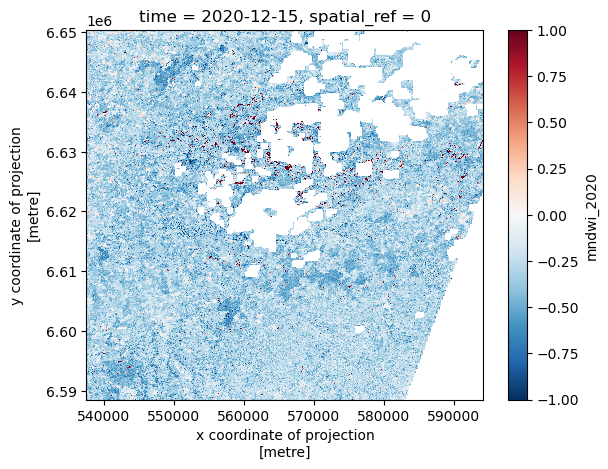

In [2]:
B3 = array["B3"]
B12 = array["B12"]
mndwi = (B3-B12)/(B3+B12)
mndwi.name = "mndwi_2020"
mndwi.compute().isel(time=0).plot()